In [168]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('data/student_performance.csv')
print(df.shape)
print(df.describe())

(6607, 20)
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000       

##### Очистка данных (Data Cleaning)
Проверим данные на нулевые значения и пропустим их, приведем типы к pandas категориальным переменным

In [169]:
# Проверка данных на нулевые значения

for column in df.columns:
    print(column, df[column].isnull().sum())

Hours_Studied 0
Attendance 0
Parental_Involvement 0
Access_to_Resources 0
Extracurricular_Activities 0
Sleep_Hours 0
Previous_Scores 0
Motivation_Level 0
Internet_Access 0
Tutoring_Sessions 0
Family_Income 0
Teacher_Quality 78
School_Type 0
Peer_Influence 0
Physical_Activity 0
Learning_Disabilities 0
Parental_Education_Level 90
Distance_from_Home 67
Gender 0
Exam_Score 0


In [170]:
# Уберем строки с нулевыми элементами

without_nulls = df.dropna(axis=0, how='any')

for i in without_nulls.columns:
    print(i, without_nulls[i].isnull().sum())

print(without_nulls.shape)
df = without_nulls

Hours_Studied 0
Attendance 0
Parental_Involvement 0
Access_to_Resources 0
Extracurricular_Activities 0
Sleep_Hours 0
Previous_Scores 0
Motivation_Level 0
Internet_Access 0
Tutoring_Sessions 0
Family_Income 0
Teacher_Quality 0
School_Type 0
Peer_Influence 0
Physical_Activity 0
Learning_Disabilities 0
Parental_Education_Level 0
Distance_from_Home 0
Gender 0
Exam_Score 0
(6378, 20)


In [171]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [172]:
# Приведем типы к категориальным переменным pandas

def convert_string_to_low_medium_high(series: pd.Series) -> pd.Series:
    series = series.astype('category')
    series = series.cat.reorder_categories(['Low', 'Medium', 'High'])
    return series

def convert_string_to_yes_no(series: pd.Series) -> pd.Series:
    series = series.astype('category')
    series = series.cat.reorder_categories(['Yes', 'No'])
    return series

df['Motivation_Level'] = convert_string_to_low_medium_high(df['Motivation_Level'])
df['Parental_Involvement'] = convert_string_to_low_medium_high(df['Parental_Involvement'])
df['Access_to_Resources'] = convert_string_to_low_medium_high(df['Access_to_Resources'])
df['Family_Income'] = convert_string_to_low_medium_high(df['Family_Income'])
df['Teacher_Quality'] = convert_string_to_low_medium_high(df['Teacher_Quality'])

df['Extracurricular_Activities'] = convert_string_to_yes_no(df['Extracurricular_Activities'])
df['Internet_Access'] = convert_string_to_yes_no(df['Internet_Access'])
df['Learning_Disabilities'] = convert_string_to_yes_no(df['Learning_Disabilities'])

In [173]:
print(df.School_Type.unique())
print(df['Peer_Influence'].unique())
print(df['Parental_Education_Level'].unique())
print(df['Gender'].unique())
print(df['Distance_from_Home'].unique())

['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['High School' 'College' 'Postgraduate']
['Male' 'Female']
['Near' 'Moderate' 'Far']


In [174]:
df['School_Type'] = df['School_Type'].astype('category')
df['Peer_Influence'] = df['Peer_Influence'].astype('category')
df['Peer_Influence'] = df['Peer_Influence'].cat.reorder_categories(['Negative', 'Neutral', 'Positive'])
df['Parental_Education_Level'] = df['Parental_Education_Level'].astype('category')
df['Parental_Education_Level'] = df['Parental_Education_Level'].cat.reorder_categories(['High School', 'College', 'Postgraduate'])
df['Gender'] = df['Gender'].astype('category')
df['Distance_from_Home'] = df['Distance_from_Home'].astype('category')
df['Distance_from_Home'] = df['Distance_from_Home'].cat.reorder_categories(['Near', 'Moderate', 'Far'])

##### Разведочный анализ данных (EDA)

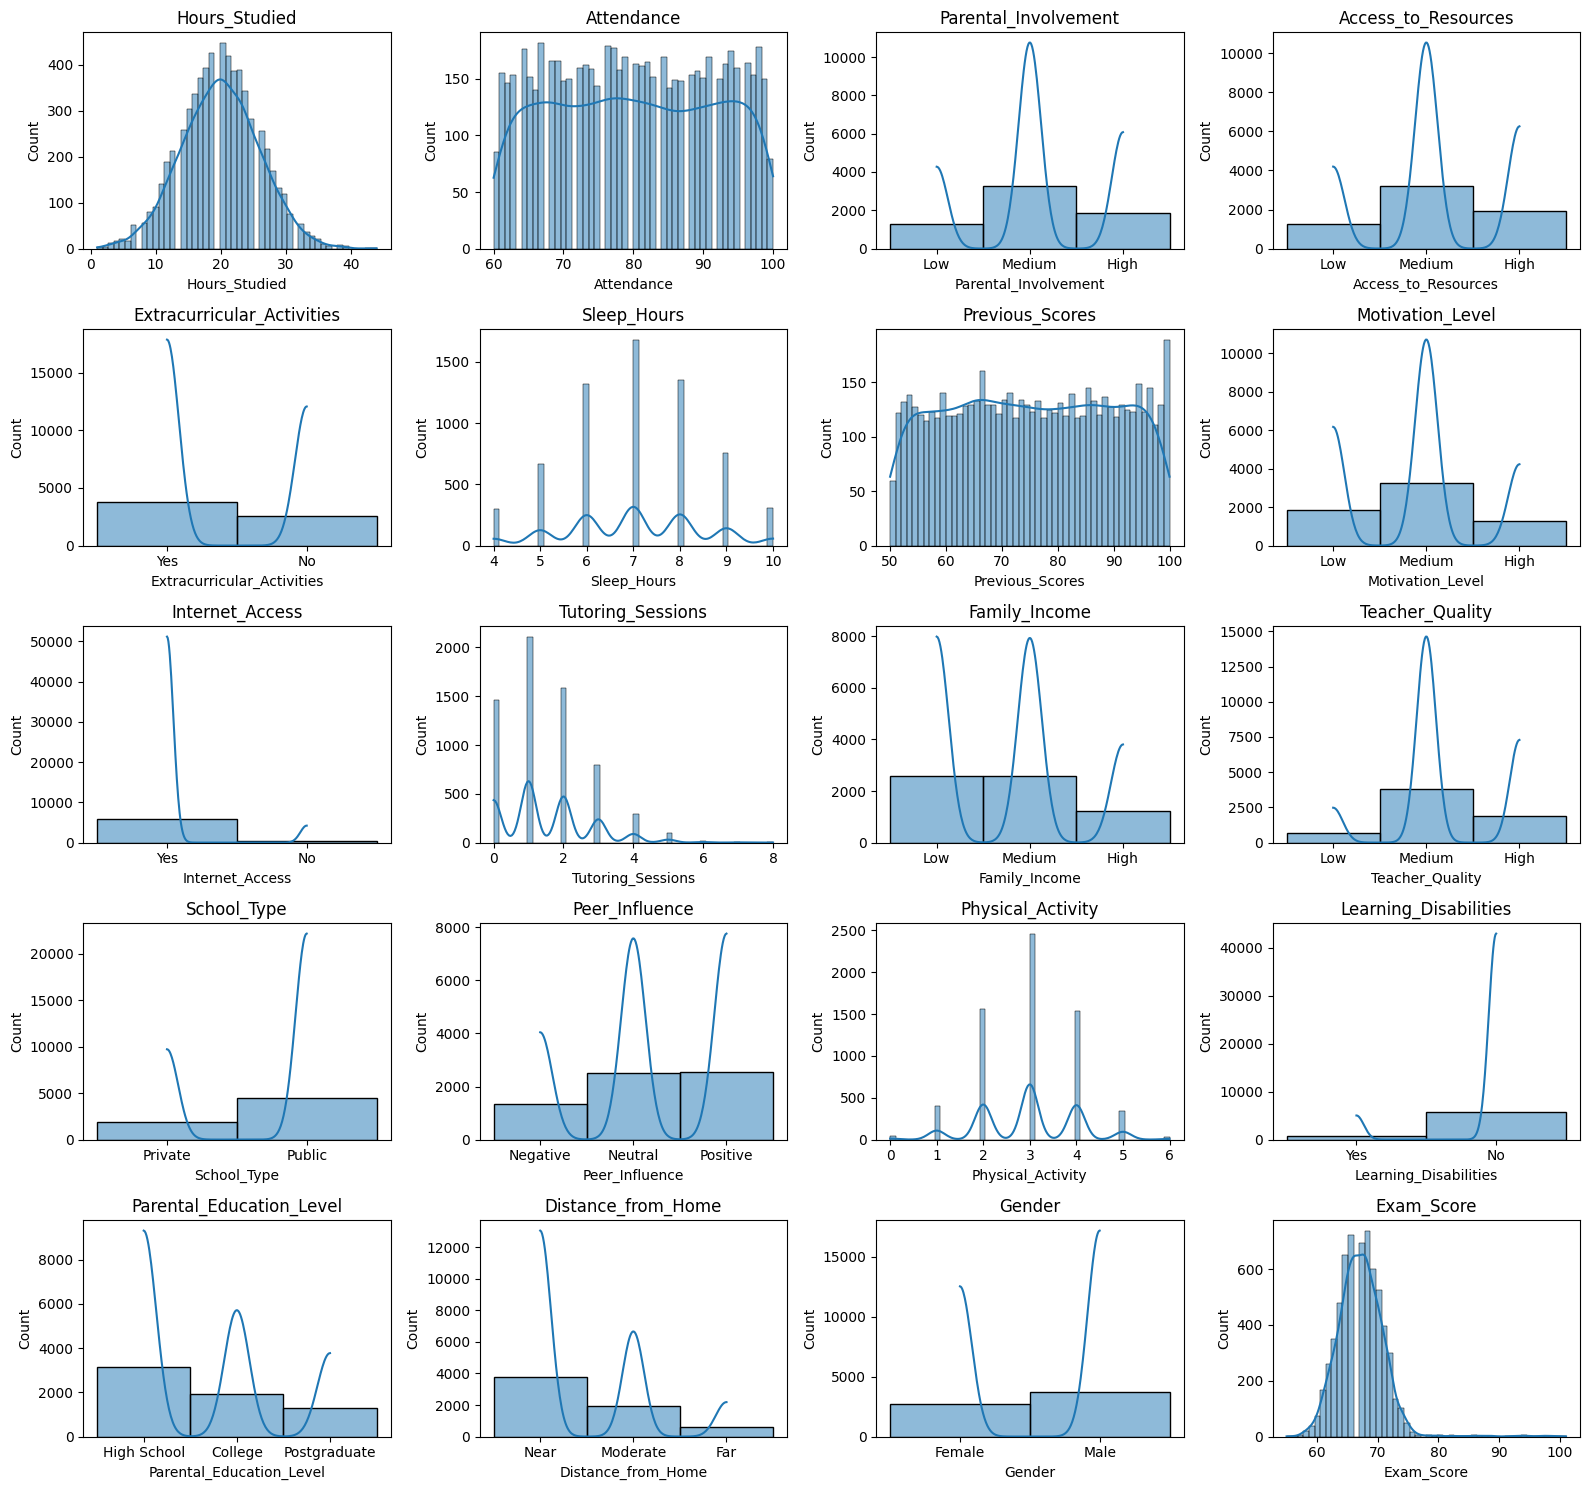

In [175]:
# Посмотрим распределение данных по каждому признаку
import matplotlib.pyplot as plt

n_cols = 4 
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[i])
    axes[i].set_title(col)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


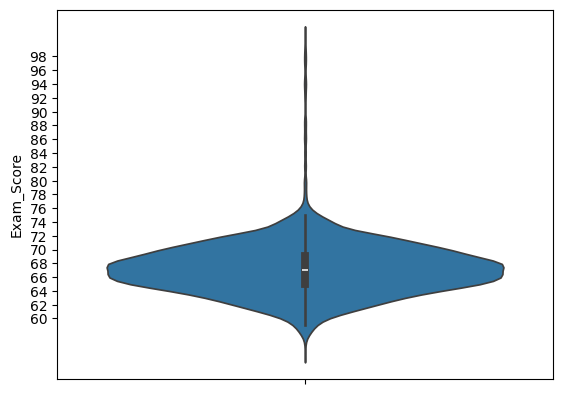

count    6378.000000
mean       67.252117
std         3.914217
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

In [176]:
# Теперь отдельно исследуем целевую переменную Exam_Score
ax = sns.violinplot(df["Exam_Score"])

ax.set_yticks([i for i in range(60, 100, 2)])

plt.show()
df["Exam_Score"].describe()

Распределение значений переменной Exam_Score напоминает распределение нормальное распределение с небольшим среднеквадратичным отклонением. Межквартильный размах составляет около 4. Это потенциально может осложнить задачу классификации, если категоризировать данные в соотношении Меньше 50: F, 50-60: E, 60-70: D, 70-80: C, 80-90: B, 90-100: A.

Так как подавляещая часть студентов получат D и модель может вести себя некачественно на краях категорий около E и A

Поэтому разработаем шкалу, в которой оценки будут распределены равномерно между E и A. Это позволит повысить качество классификации на всех данных.

In [177]:
# Найдем 6 перцентелей и по ним построим шкалу оценивания
percentiles = [round(100 / 6 * i) / 100 for i in range(1, 7)]

percentiles_values = [0] + list(df['Exam_Score'].quantile(percentiles))
print(list(percentiles_values))
labels = ['F', 'E', 'D', 'C', 'B', 'A']

# Построим шкалу оценивания
df['Exam_Score_Scaled'] = pd.cut(df['Exam_Score'], bins=percentiles_values, labels=labels, right=False, include_lowest=True)
df['Exam_Score_Scaled'] = df['Exam_Score_Scaled'].astype('category')
df['Exam_Score_Scaled'] = df['Exam_Score_Scaled'].cat.reorder_categories(labels, ordered=True)
print(df[['Exam_Score', 'Exam_Score_Scaled']].head())
print(df['Exam_Score_Scaled'].value_counts())
df.dropna(axis=0, how='any', inplace=True)

[0, 64.0, 66.0, 67.0, 69.0, 70.0, 101.0]
   Exam_Score Exam_Score_Scaled
0          67                 C
1          61                 F
2          74                 A
3          71                 A
4          70                 A
Exam_Score_Scaled
A    1580
C    1430
E    1128
F     918
D     722
B     599
Name: count, dtype: int64


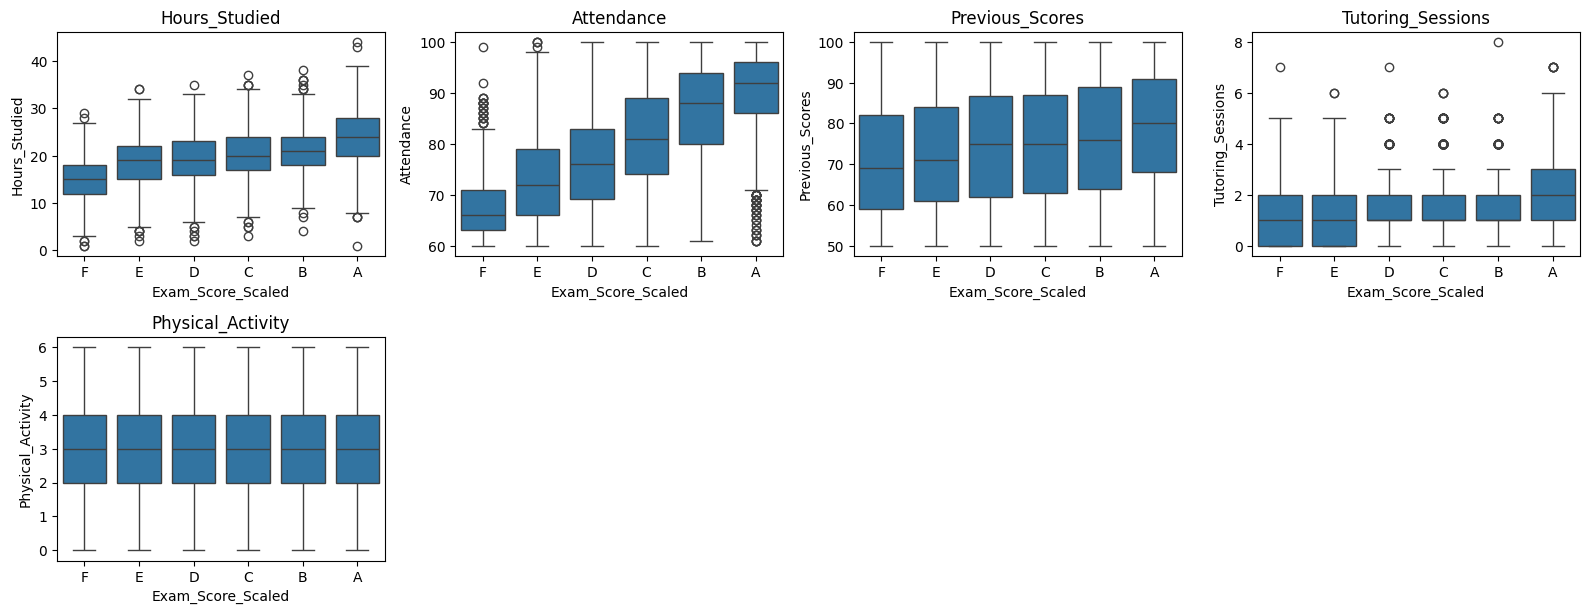

In [178]:
# Теперь посмотрим на зависимость оценки от других признаков (сначала численных)

import matplotlib.pyplot as plt

n_cols = 4 
n_rows = (len(df.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']):
    sns.boxplot(x='Exam_Score_Scaled', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Видим определенные зависимости оценки от количество часов на подготовку, степени посещения и предыдущей оценки. Будем учитывать их при построении модели

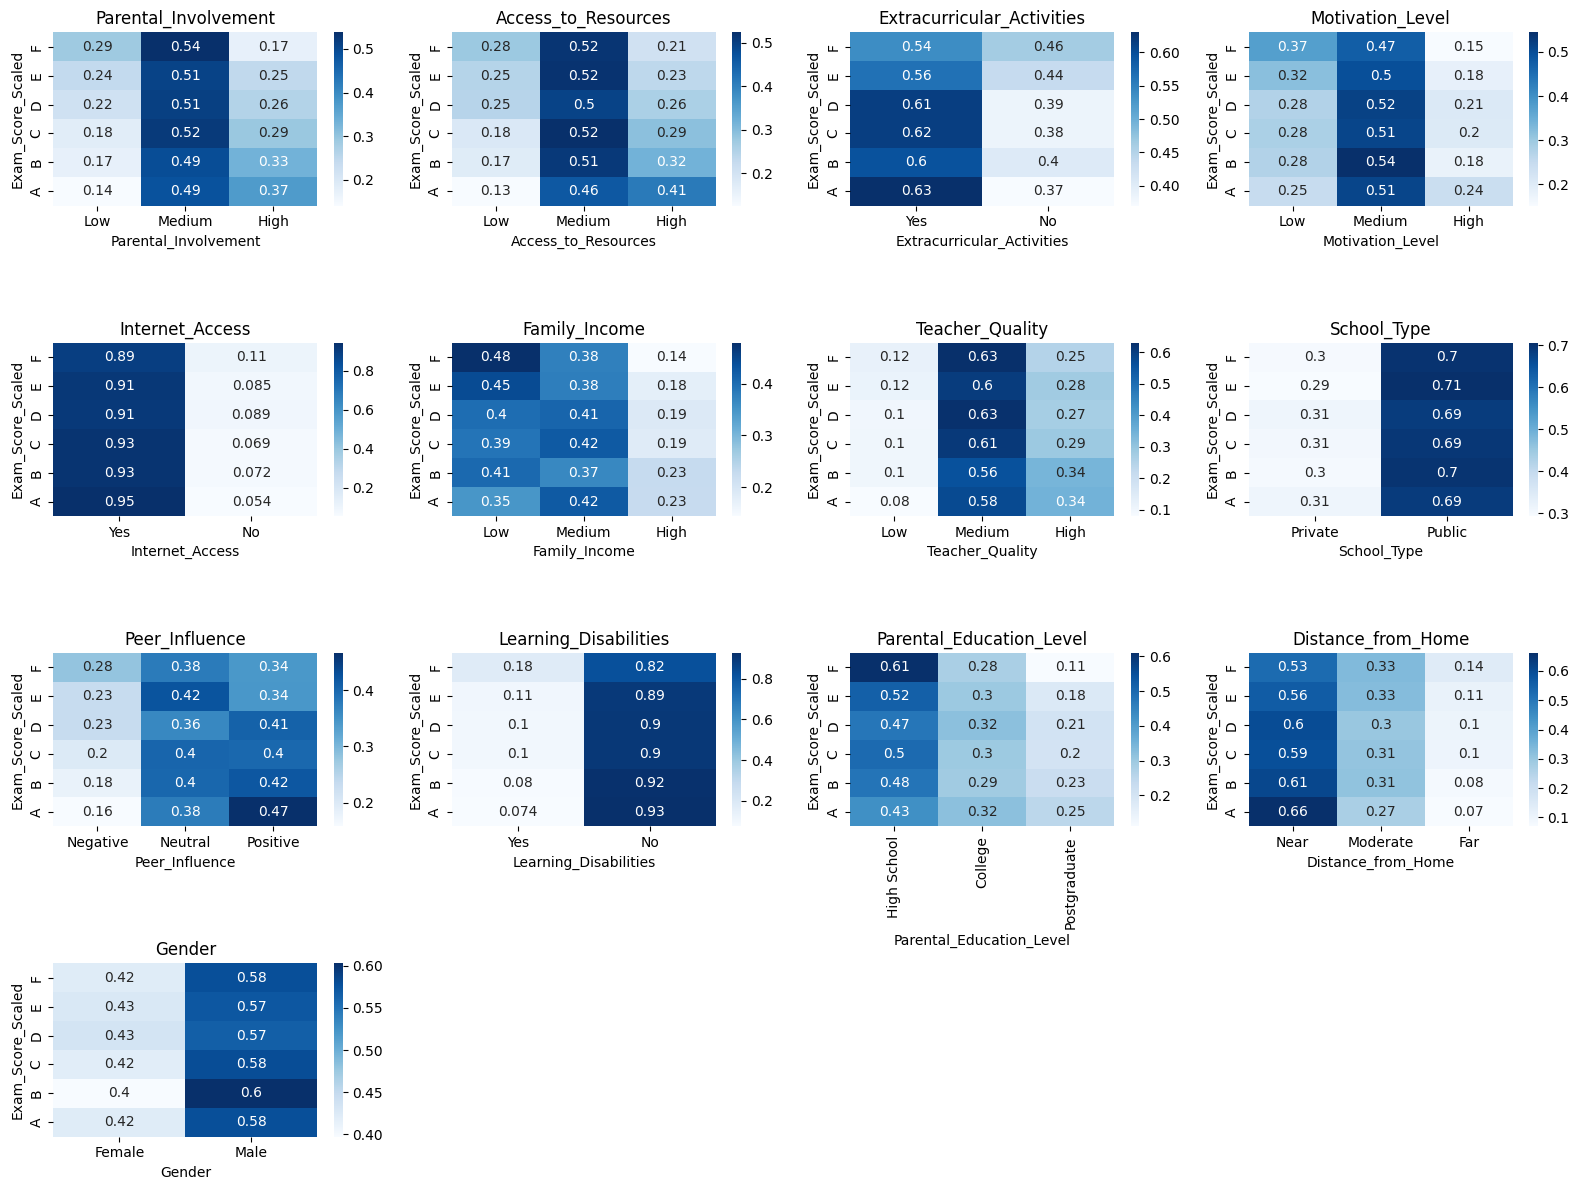

In [ ]:
# Теперь исследуем зависимость оценки от категориальных признаков
categorical_columns = [
    'Parental_Involvement',
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender',
]
n_cols = 4 
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    contingency_table = pd.crosstab(df['Exam_Score_Scaled'], df[col], normalize='index')
    sns.heatmap(contingency_table, annot=True, ax=axes[i], cmap='Blues')

    axes[i].set_title(col)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Видим потенциальное влияние признаков `Parental_Involvement`, `Access_to_Resources`, `Extracurrical_Activities`, `Motivation_Level`, `Internet_Access`, `Family_Income`, `Teacher_Quality`, `Peer_Influence` на оценку статистики `Exam_Score_Scaled`, `Learning_Disabilities`, `Test_Satisfaction`, `Grade_Point_Average`, `Grade_Point_Average_Scaled`, `Grade_Scaled`, `School_Performance`, `School_Performance_Scaled`, `Student_Progress`, `Student_Progress_Scaled`, `Parental_Education_Level`, `Distance_from_Home`.

Оказалось, что тип школы, гендер не имеют прямой связи с оценкой напрямую

##### Подбор модели и обучение

In [180]:
# Выберем все столбцы, кроме Gender, Tutoring_Sessions, School_Type, Physical_Activity
model_dataset = df.drop(['Gender', 'Tutoring_Sessions', 'School_Type', 'Physical_Activity'], axis=1)
model_dataset.dtypes

Hours_Studied                    int64
Attendance                       int64
Parental_Involvement          category
Access_to_Resources           category
Extracurricular_Activities    category
Sleep_Hours                      int64
Previous_Scores                  int64
Motivation_Level              category
Internet_Access               category
Family_Income                 category
Teacher_Quality               category
Peer_Influence                category
Learning_Disabilities         category
Parental_Education_Level      category
Distance_from_Home            category
Exam_Score                       int64
Exam_Score_Scaled             category
dtype: object

In [181]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Parental_Education_Level', 'Access_to_Resources', 'Motivation_Level', 
        'Internet_Access', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 
        'Learning_Disabilities', 'Parental_Involvement', 'Distance_from_Home', 
        'Extracurricular_Activities', 'Exam_Score_Scaled']

for col in cols:
    model_dataset[col] = le.fit_transform(model_dataset[col])
model_dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Exam_Score_Scaled
0,23,84,1,0,0,7,73,1,1,1,2,2,0,1,2,67,2
1,19,64,1,2,0,8,59,1,1,2,2,0,0,0,1,61,5
2,24,98,2,2,1,7,91,2,1,2,2,1,0,2,2,74,0
3,29,89,1,2,1,8,98,2,1,2,2,0,0,1,1,71,0
4,19,92,2,2,1,6,65,2,1,2,0,1,0,0,2,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,0,2,2,0,1,2,68,2
6603,23,76,0,2,0,8,81,2,1,1,0,2,0,1,2,69,1
6604,20,90,2,1,1,6,65,1,1,1,2,0,0,2,2,68,2
6605,10,86,0,0,1,6,91,0,1,1,2,2,0,1,0,68,2


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

X, y = model_dataset.drop(['Exam_Score_Scaled'], inplace=False, axis=1), model_dataset['Exam_Score_Scaled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

cv = StratifiedKFold(n_splits=3)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'RandomForest': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}),
    'LogisticRegression': (LogisticRegression(max_iter=5000, solver='lbfgs'), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

best_estimators = {}
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=cv, scoring='accuracy')
    data = X_train_scaled if name != 'RandomForest' else X_train
    grid.fit(data, y_train)
    best_estimators[name] = grid.best_estimator_
    print(f'{name} best params: {grid.best_params_}')
    print(f'{name} best CV accuracy: {grid.best_score_:.3f}')

SVM best params: {'C': 1, 'kernel': 'linear'}
SVM best CV accuracy: 1.000
SVM test accuracy: 1.000
RandomForest best params: {'max_depth': None, 'n_estimators': 100}
RandomForest best CV accuracy: 1.000
RandomForest test accuracy: 1.000
LogisticRegression best params: {'C': 10}
LogisticRegression best CV accuracy: 1.000
LogisticRegression test accuracy: 1.000
KNN best params: {'n_neighbors': 7}
KNN best CV accuracy: 0.532
KNN test accuracy: 0.552


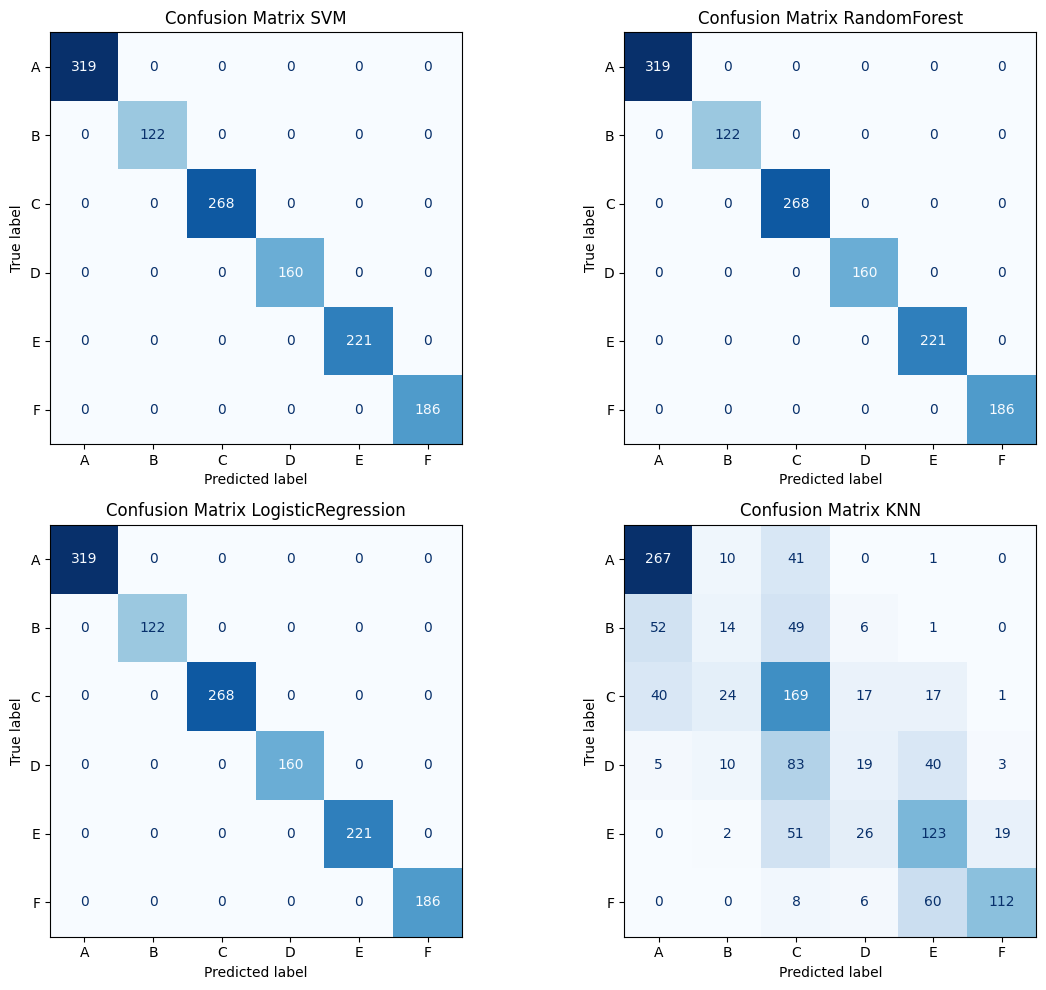

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Построение confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

class_names = sorted(df.Exam_Score_Scaled.unique())

for i, (name, model) in enumerate(best_estimators.items()):
    if name == 'RandomForest':
        X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
        y_pred = model.predict(X_test_df)

    else:
        y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title(f'Confusion Matrix {name}')

plt.tight_layout()
plt.show()

Получились впечатляющие результаты при применении методов SVM, Случайных лесов и логистической регрессии. Качество после кросс-валидации 100% на тестовом наборе. Это может быть ожидаемо, исходя из графиков которые мы наблюдали раньше, которые показывали зависимость близкую к линейной для многих признаков и целевой переменной. Но это также может быть признаком переобучения, поэтому проведем дополнительные проверки

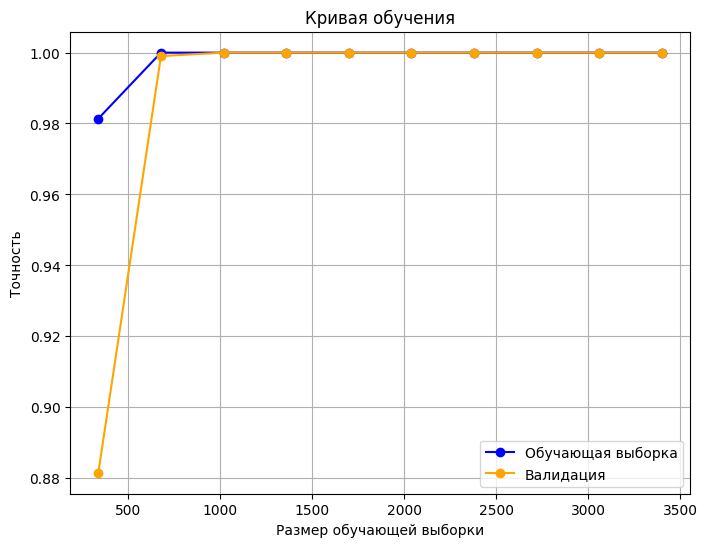

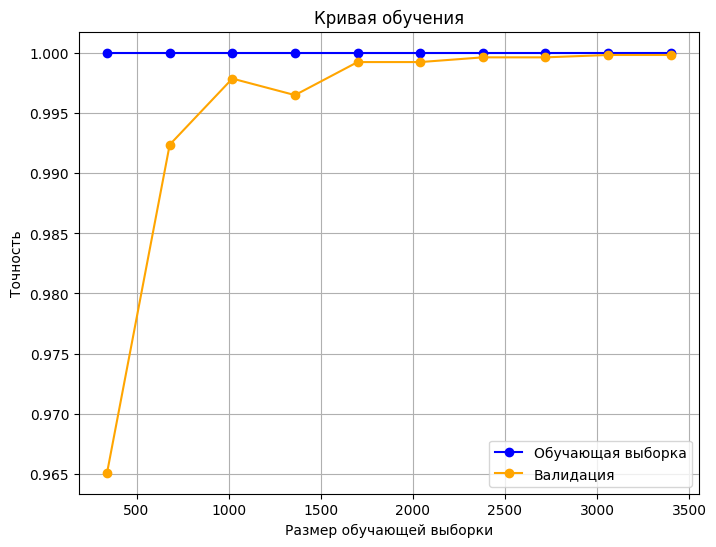

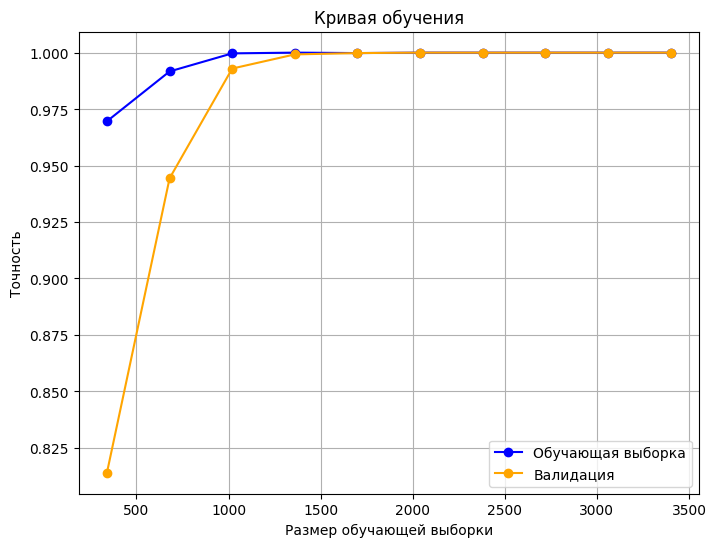

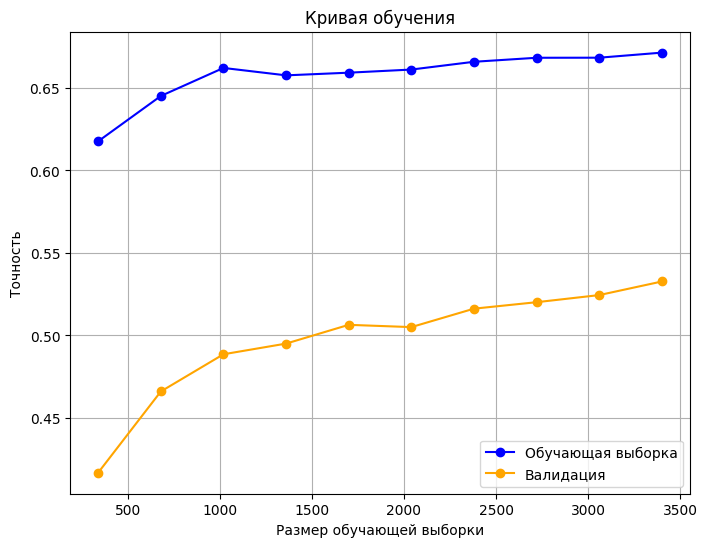

In [ ]:
# Построим кривые обучения

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy'):
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Обучающая выборка')
    plt.plot(train_sizes, valid_mean, 'o-', color='orange', label='Валидация')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Точность')
    plt.title('Кривая обучения')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

plot_learning_curve(best_estimators['SVM'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))
plot_learning_curve(best_estimators['RandomForest'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))
plot_learning_curve(best_estimators['LogisticRegression'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))
plot_learning_curve(best_estimators['KNN'], X_train_scaled, y_train, cv=StratifiedKFold(n_splits=3))

Заметим, что все модели, кроме KNN после преодоления размера обучающей выборки 2000, стабилизируются, разрыв между обучающей и валидационной точностью исчезает. Это означает, что модели склонны к оверфиттингу только на самых малых выборках, а не на больших. Быстрее всего стабилизируется SVM, поэтому ее вероятно можно считать лучшим решением.